Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM
Initializing sim with 20000 people for 60 days
  Running 2020-03-01 ( 0/60) (0.11 s)  ———————————————————— 2%
  Running 2020-03-11 (10/60) (0.14 s)  •••————————————————— 18%
  Running 2020-03-21 (20/60) (0.17 s)  ••••••—————————————— 34%
  Running 2020-03-31 (30/60) (0.20 s)  ••••••••••—————————— 51%
  Running 2020-04-10 (40/60) (0.24 s)  •••••••••••••——————— 67%
  Running 2020-04-20 (50/60) (0.29 s)  ••••••••••••••••———— 84%
  Running 2020-04-30 (60/60) (0.41 s)  •••••••••••••••••••• 100%

Simulation summary:
       12,730 cumulative infections
          596 cumulative reinfections
       10,182 cumulative infectious
        6,395 cumulative symptomatic cases
          386 cumulative severe cases
          114 cumulative critical cases
        5,159 cumulative recoveries
           14 cumulative deaths
            0 cumulative tests
            0 cumulative diagnoses
            0 cumulative known deaths
            0 cumulative quaranti

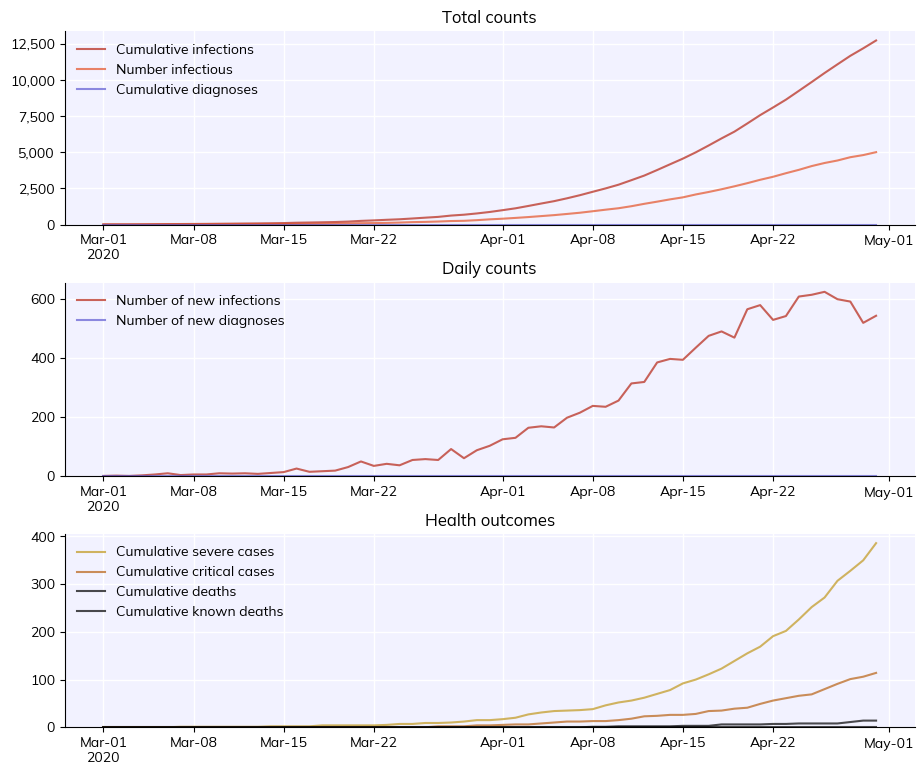

In [1]:
import covasim as cv

sim = cv.Sim()
sim.run()
fig = sim.plot()

In [6]:
pars = dict(
    pop_size = 50e3,
    pop_infected = 100,
    start_day = '2024-04-01',
    end_day = '2024-06-01',
)

sim = cv.Sim(pars)
sim.run()

Initializing sim with 50000 people for 61 days
  Running 2024-04-01 ( 0/61) (0.20 s)  ———————————————————— 2%
  Running 2024-04-11 (10/61) (0.26 s)  •••————————————————— 18%
  Running 2024-04-21 (20/61) (0.33 s)  ••••••—————————————— 34%
  Running 2024-05-01 (30/61) (0.41 s)  ••••••••••—————————— 50%
  Running 2024-05-11 (40/61) (0.53 s)  •••••••••••••——————— 66%
  Running 2024-05-21 (50/61) (0.68 s)  ••••••••••••••••———— 82%
  Running 2024-05-31 (60/61) (0.86 s)  •••••••••••••••••••— 98%
Simulation summary:
       41,466 cumulative infections
        3,679 cumulative reinfections
       36,997 cumulative infectious
       24,043 cumulative symptomatic cases
        1,542 cumulative severe cases
          475 cumulative critical cases
       24,320 cumulative recoveries
           86 cumulative deaths
            0 cumulative tests
            0 cumulative diagnoses
            0 cumulative known deaths
            0 cumulative quarantined people
            0 cumulative isolated peopl

Sim(<no label>; 2024-04-01 to 2024-06-01; pop: 50000 random; epi: 41466⚙, 86☠)

In [7]:
sim.results['new_infections']

[<class 'covasim.base.Result'>]
————————————————————————————————————————————————————————————————————————
Properties:
  npts                    
————————————————————————————————————————————————————————————————————————
color: #b62413
 name: Number of new infections
scale: True
————————————————————————————————————————————————————————————————————————
values:
array([   0.,    0.,    3.,   12.,   30.,   30.,   35.,   41.,   37.,
         58.,   65.,   84.,   78.,   83.,   97.,  110.,  134.,  154.,
        185.,  203.,  222.,  188.,  237.,  263.,  327.,  355.,  383.,
        421.,  461.,  556.,  562.,  609.,  730.,  755.,  830.,  837.,
        897.,  963., 1010., 1157., 1156., 1233., 1340., 1418., 1369.,
       1386., 1469., 1526., 1448., 1547., 1489., 1440., 1425., 1312.,
       1276., 1192., 1195., 1104., 1050.,  962.,  982.,  845.])

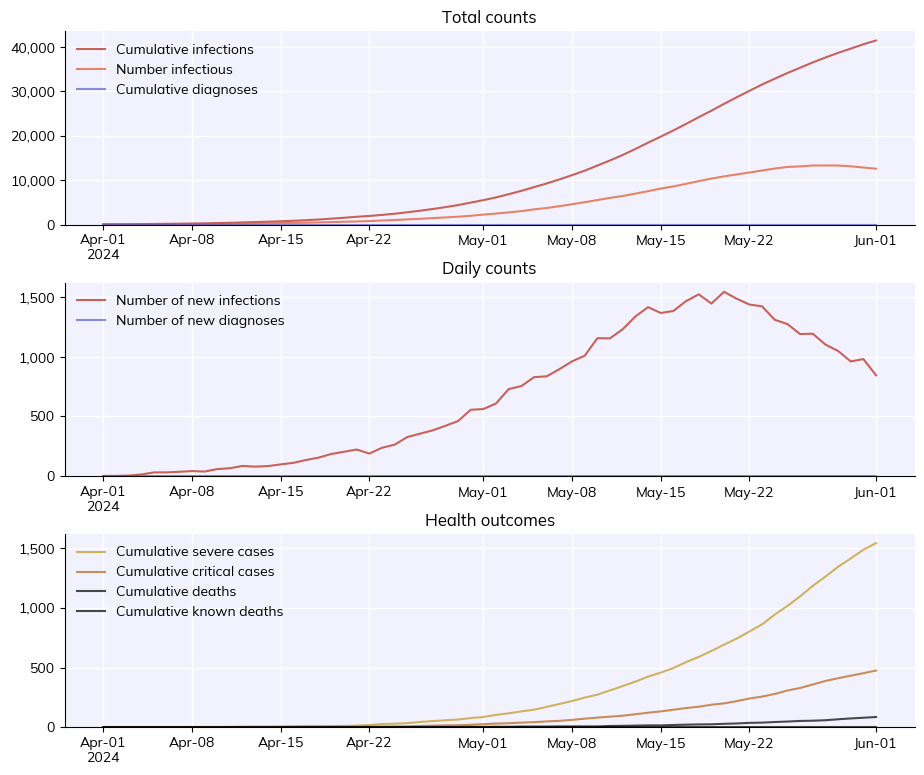

In [8]:
fig1 = sim.plot()

Initializing sim with 50000 people for 61 days
  Running 2020-04-01 ( 0/61) (0.19 s)  ———————————————————— 2%
  Running 2020-04-11 (10/61) (0.25 s)  •••————————————————— 18%
  Running 2020-04-21 (20/61) (0.33 s)  ••••••—————————————— 34%
  Running 2020-05-01 (30/61) (0.42 s)  ••••••••••—————————— 50%
  Running 2020-05-11 (40/61) (0.53 s)  •••••••••••••——————— 66%
  Running 2020-05-21 (50/61) (0.69 s)  ••••••••••••••••———— 82%
  Running 2020-05-31 (60/61) (0.87 s)  •••••••••••••••••••— 98%
Simulation summary:
       41,466 cumulative infections
        3,679 cumulative reinfections
       36,997 cumulative infectious
       24,043 cumulative symptomatic cases
        1,542 cumulative severe cases
          475 cumulative critical cases
       24,320 cumulative recoveries
           86 cumulative deaths
            0 cumulative tests
            0 cumulative diagnoses
            0 cumulative known deaths
            0 cumulative quarantined people
            0 cumulative isolated peopl

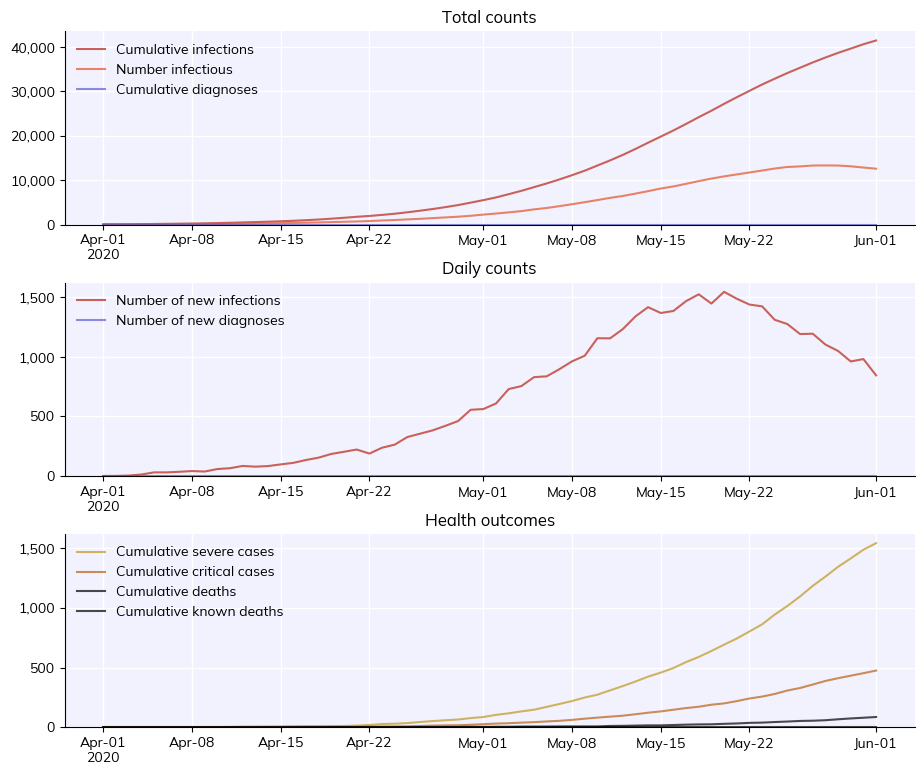

In [9]:
sim = cv.Sim(pop_size=50e3, pop_infected=100, start_day='2020-04-01', end_day='2020-06-01')
sim.run()
fig2 = sim.plot()

In [ ]:
import covasim as cv

# Custom intervention -- see Tutorial 5
def protect_elderly(sim):
    if sim.t == sim.day('2020-04-01'):
        elderly = sim.people.age>70
        sim.people.rel_sus[elderly] = 0.0

pars = dict(
    pop_type = 'hybrid', # Use a more realistic population model
    location = 'japan', # Use population characteristics for Japan
    pop_size = 50e3, # Have 50,000 people total in the population
    pop_infected = 100, # Start with 100 infected people
    n_days = 90, # Run the simulation for 90 days
    verbose = 0, # Do not print any output
)

# Running with multisims -- see Tutorial 3
s1 = cv.Sim(pars, label='Default')
s2 = cv.Sim(pars, interventions=protect_elderly, label='Protect the elderly')
msim = cv.MultiSim([s1, s2])
msim.run()
fig = msim.plot(['cum_deaths', 'cum_infections'])

In [ ]:
import covasim as cv
cv.options(jupyter=True, verbose=0)

sim = cv.Sim()
msim = cv.MultiSim(sim)
msim.run(n_runs=5)
msim.plot()

Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


In [1]:
import covasim as cv

cv.data.show_locations()

Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM
There are 280 age distributions and 176 household size distributions.

List of available locations (case insensitive):

{'age_distributions': ['Afghanistan',
                       'Albania',
                       'Algeria',
                       'Angola',
                       'Antigua and Barbuda',
                       'Argentina',
                       'Armenia',
                       'Aruba',
                       'Australia',
                       'Austria',
                       'Azerbaijan',
                       'Bahamas',
                       'Bahrain',
                       'Bangladesh',
                       'Barbados',
                       'Belarus',
                       'Belgium',
                       'Belize',
                       'Benin',
                       'Bhutan',
                       'Bolivia',
                       'Bolivia (Plurinational State of)',
                       'Bosnia and Herz